**Import Required Libraries**

- Imports libraries for data handling (`NumPy`, `Pandas`), visualization (`Seaborn`), preprocessing (`StandardScaler`), model building (`TensorFlow/Keras`), and loading the dataset (`fetch_california_housing`).


In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

**Load the California Housing Dataset**

- Loads the built-in California housing dataset from `sklearn.datasets`.
- `X` contains the input features, and `y` is the target variable (median house value).


In [30]:
# Step 1: Load the California housing dataset
california_housing = fetch_california_housing()
X = california_housing.data  # Features
y = california_housing.target  # Target variable

**Preprocess the Data**

- Normalizes the feature values using `StandardScaler` for better training convergence.
- Splits the dataset into training and testing sets (80/20 split).


In [ ]:
# Step 2: Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**Build the Neural Network Model**

- Constructs a sequential neural network with:
  - An input layer defined via `Input(shape=...)`.
  - Two hidden layers with 64 and 32 neurons using ReLU activation.
  - A single output neuron for predicting house prices (regression).


In [33]:
# Step 3: Build the model using the Input layer
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  # Define input shape here
model.add(Dense(units=64, activation='relu'))  # Hidden layer with 64 neurons
model.add(Dense(units=32, activation='relu'))  # Another hidden layer with 32 neurons
model.add(Dense(units=1))  # Output layer with a single neuron (regression)

**Compile the Model**

- Compiles the model using the Adam optimizer and Mean Squared Error (MSE) as the loss function, suitable for regression tasks.


In [34]:
# Step 4: Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

**Train the Model**

- Trains the model using the training data for 100 epochs with a batch size of 32.
- Uses 20% test data as validation to monitor performance during training.


In [36]:
# Step 5: Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2126 - val_loss: 0.2637
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2185 - val_loss: 0.2583
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2167 - val_loss: 0.2626
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2149 - val_loss: 0.2626
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2134 - val_loss: 0.2589
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2123 - val_loss: 0.2587
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2138 - val_loss: 0.2591
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2181 - val_loss: 0.2659
Epoch 9/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2166 - val_loss: 0.2689
Epoch 10/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2097 - val_loss: 0.2591
Epoch 11/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2115 - val_loss: 0.2577
Epoch 12/100
516/516 ━━━━━━━━━━━━━━━━━━━━

**Evaluate the Model on Test Data**

- Evaluates the model on the test set.
- Prints the Mean Squared Error (MSE) to assess prediction accuracy.


In [37]:
# Step 6: Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Mean Squared Error on the test set: {loss}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2531  
Mean Squared Error on the test set: 0.2549746632575989


**Make and Compare Predictions**

- Uses the trained model to predict house prices from the test set.
- Prints the first five predicted values alongside actual house prices.


In [ ]:
# Step 7: Make predictions
predictions = model.predict(X_test)
# You can now compare predictions with actual values
print(f"Predictions: {predictions[:5]}")
print(f"Actual Prices: {y_test[:5]}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step


**Visualize Prediction Performance**

- Plots a regression line between predicted and actual prices using a sample of 40 test points.
- Helps visually assess how well the model performs.


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step


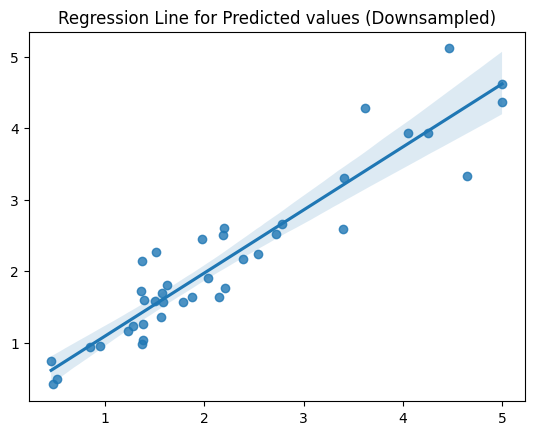

In [44]:
#OPTIONAL

import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions
predictions = model.predict(X_test)

# Downsample the data (e.g., every 10th point)
sampled_y_test = y_test[:40]
sampled_predictions = predictions[:40]

# Plot regression line with the downsampled data
sns.regplot(x=sampled_y_test, y=sampled_predictions)
plt.title("Regression Line for Predicted values (Downsampled)")
plt.show()
